In [1]:
import itertools
import math
import numpy as np
from scipy import integrate
from scipy import special
import matplotlib.pyplot as plt

 -  https://en.wikipedia.org/w/index.php?title=Legendre_polynomials&action=edit&section=5

$$P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} (x^2 -1)^n $$

In [2]:
p = np.poly1d([1, 2])

In [3]:
class Legendre:
    
    #base_polynomial = np.poly1d([1, 0, -1])
    
    @staticmethod
    def first_kind_factory(n):
        def wrapped(x):
            #return (Legendre.base_polynomial ** n).deriv(n)(x) / (2. ** n * math.factorial(n)) 
            return special.legendre(n)(x)
        return wrapped
    
    @staticmethod
    def second_kind_factory(n):
        def wrapped(x):
            if n == 0:
                return 0.5 * np.log((1. + x) / (1. - x))
            elif n == 1:
                return Legendre.first_kind_factory(n=1)(x) * Legendre.second_kind_factory(n=0)(x) - 1.
            else:
                return (2. * n - 1.) / n * x * Legendre.second_kind_factory(n=n - 1)(x) - (n - 1.) / n * Legendre.second_kind_factory(n=n - 2)(x)
        return wrapped

In [4]:
N = 20

In [5]:
P = [Legendre.first_kind_factory(n=i) for i in range(N)]

In [6]:
Q = [Legendre.second_kind_factory(n=i) for i in range(N)]

In [7]:
eps = 1e-6
xlin = np.linspace(-1, 1, 2000)
xlineps = np.linspace(-1 + eps, 1 - eps, 2000)

(-1.1, 1.1)

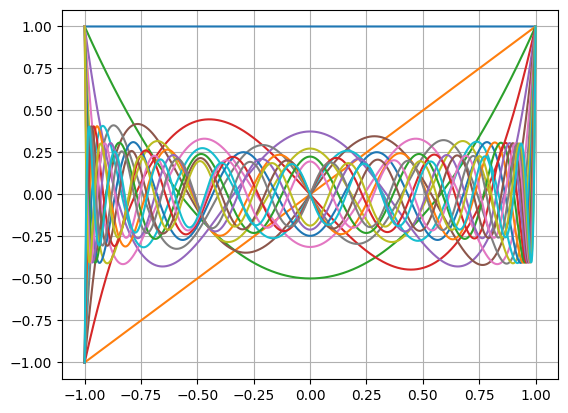

In [8]:
fig, axe = plt.subplots()
for Pk in P:
    axe.plot(xlin, Pk(xlin))
axe.grid()
axe.set_ylim([-1.1, 1.1])

In [9]:
def integrand_factory(i, j):
    def wrapped(x):
        return Legendre.first_kind_factory(i)(x) * Legendre.first_kind_factory(i)(j)
    return wrapped

In [10]:
for i in range(N):
    print(i, Legendre.first_kind_factory(i)(x=1.))

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0


In [11]:
for i, j in itertools.combinations(range(N), 2):
    I, Ierr = integrate.quad(integrand_factory(i, j), a=-1., b=+1.)
    print(i, j, I, Ierr)

0 1 2.0 2.220446049250313e-14
0 2 2.0 2.220446049250313e-14
0 3 2.0 2.220446049250313e-14
0 4 2.0 2.220446049250313e-14
0 5 2.0 2.220446049250313e-14
0 6 2.0 2.220446049250313e-14
0 7 2.0 2.220446049250313e-14
0 8 2.0 2.220446049250313e-14
0 9 2.0 2.220446049250313e-14
0 10 2.0 2.220446049250313e-14
0 11 2.0 2.220446049250313e-14
0 12 2.0 2.220446049250313e-14
0 13 2.0 2.220446049250313e-14
0 14 2.0 2.220446049250313e-14
0 15 2.0 2.220446049250313e-14
0 16 2.0 2.220446049250313e-14
0 17 2.0 2.220446049250313e-14
0 18 2.0 2.220446049250313e-14
0 19 2.0 2.220446049250313e-14
1 2 0.0 2.212168008303464e-14
1 3 0.0 3.318252012455196e-14
1 4 0.0 4.424336016606928e-14
1 5 0.0 5.5304200207586604e-14
1 6 0.0 6.636504024910392e-14
1 7 0.0 7.742588029062124e-14
1 8 0.0 8.848672033213856e-14
1 9 0.0 9.95475603736559e-14
1 10 0.0 1.1060840041517321e-13
1 11 0.0 1.216692404566905e-13
1 12 0.0 1.3273008049820784e-13
1 13 0.0 1.4379092053972517e-13
1 14 0.0 1.5485176058124249e-13
1 15 0.0 1.6591260062

/tmp/ipykernel_94/1151391696.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I, Ierr = integrate.quad(integrand_factory(i, j), a=-1., b=+1.)


5 15 -4.1584273840302457e-10 3.402971828720692e-08
5 16 -6.040482776530655e-10 4.7017812499565935e-08
5 17 -8.642256365727809e-10 6.369757421348971e-08
5 18 -1.0304571769801384e-09 8.480502513360458e-08
5 19 -1.3650173064327674e-09 1.1116805832558757e-07
6 7 1.0186340659856796e-10 8.69272432070265e-09
6 8 1.4551915228366852e-10 1.9497384336109505e-08
6 9 4.94765117764473e-10 3.970568619877825e-08
6 10 7.566995918750763e-10 7.495450143669918e-08
6 11 1.0477378964424133e-09 1.3310312107294228e-07
6 12 2.7939677238464355e-09 2.2475300833860584e-07
6 13 5.122274160385132e-09 3.638222621976541e-07
6 14 6.51925802230835e-09 5.681747916836446e-07
6 15 9.313225746154785e-09 8.603042010483447e-07
6 16 1.210719347000122e-08 1.2680723857222367e-06
6 17 2.0489096641540527e-08 1.825502839086914e-06
6 18 2.2351741790771484e-08 2.573628670059365e-06
6 19 4.0978193283081055e-08 3.561395331488147e-06
7 8 1.3268300397706916e-10 2.7091767119028337e-07
7 9 -3.2677920288025224e-10 6.211959096316354e-07
7 1

(-1.1, 1.1)

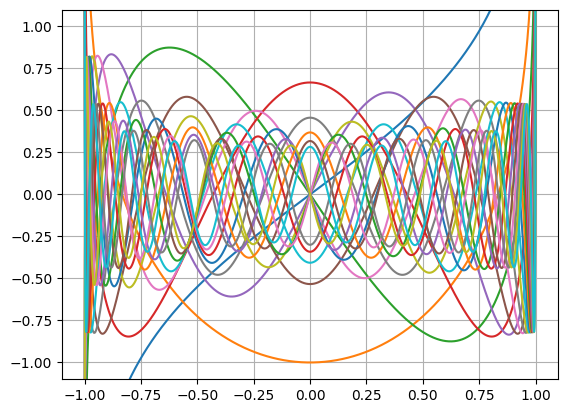

In [12]:
fig, axe = plt.subplots()
for Qk in Q:
    axe.plot(xlineps, Qk(xlineps))
axe.grid()
axe.set_ylim([-1.1, 1.1])